In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/solar_power_forecasting_dataset_final_cleaned.csv")
df.head()

,timestamp,location_lat,location_lon,elevation_m,temperature_C,humidity_%,wind_speed_m_s,cloud_cover_%,solar_irradiance_W_m2,panel_capacity_kW,panel_efficiency_%,tilt_angle_deg,azimuth_deg,actual_power_output_kW
0,2023-01-01 0:00:00,-22.582779,82.799392,896.736124,-1.629966,84.237036,2.997440,32.912325,0.000000,371.036046,22.272467,34.846743,270,0.000000
1,2023-01-01 1:00:00,81.128575,-113.575682,284.453326,0.033410,91.951477,1.921751,14.395022,43.078871,440.669836,12.179046,31.618299,270,2.311094
2,2023-01-01 2:00:00,41.758910,-55.209710,379.077675,-2.808337,79.259359,3.298926,40.869295,0.000000,232.126758,24.196957,21.062217,90,0.000000
3,2023-01-01 3:00:00,17.758527,58.781029,542.013385,3.345238,87.685304,3.043634,61.477860,138.258448,145.300187,22.648362,29.592759,270,4.549710
4,2023-01-01 4:00:00,-61.916645,-6.447836,610.960003,-0.374230,65.194276,4.385814,35.145649,108.339004,160.104441,23.782799,21.905798,270,4.084163


In [3]:
df.dropna()

,timestamp,location_lat,location_lon,elevation_m,temperature_C,humidity_%,wind_speed_m_s,cloud_cover_%,solar_irradiance_W_m2,panel_capacity_kW,panel_efficiency_%,tilt_angle_deg,azimuth_deg,actual_power_output_kW
0,2023-01-01 0:00:00,-22.582779,82.799392,896.736124,-1.629966,84.237036,2.997440,32.912325,0.000000,371.036046,22.272467,34.846743,270,0.000000
1,2023-01-01 1:00:00,81.128575,-113.575682,284.453326,0.033410,91.951477,1.921751,14.395022,43.078871,440.669836,12.179046,31.618299,270,2.311094
2,2023-01-01 2:00:00,41.758910,-55.209710,379.077675,-2.808337,79.259359,3.298926,40.869295,0.000000,232.126758,24.196957,21.062217,90,0.000000
3,2023-01-01 3:00:00,17.758527,58.781029,542.013385,3.345238,87.685304,3.043634,61.477860,138.258448,145.300187,22.648362,29.592759,270,4.549710
4,2023-01-01 4:00:00,-61.916645,-6.447836,610.960003,-0.374230,65.194276,4.385814,35.145649,108.339004,160.104441,23.782799,21.905798,270,4.084163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2025-04-13 3:00:00,67.866953,91.452207,2898.422199,14.954878,68.389429,3.863008,36.130727,110.593540,161.742400,21.884572,0.089989,0,3.393247
19996,2025-04-13 4:00:00,-81.573488,95.229697,1119.719872,15.739929,78.441112,5.349676,61.281530,0.000000,187.938492,21.688793,17.385313,0,0.000000
19997,2025-04-13 5:00:00,-35.334276,-82.955005,914.024583,17.172301,64.316856,6.428989,62.517707,126.682172,191.469166,20.116801,25.935587,90,4.867205
19998,2025-04-13 6:00:00,-10.202399,-23.644882,1222.087583,16.613019,54.415939,0.000000,82.755487,136.615626,65.686493,17.491709,1.431338,90,1.378555


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               20000 non-null  object 
 1   location_lat            20000 non-null  float64
 2   location_lon            20000 non-null  float64
 3   elevation_m             20000 non-null  float64
 4   temperature_C           20000 non-null  float64
 5   humidity_%              20000 non-null  float64
 6   wind_speed_m_s          20000 non-null  float64
 7   cloud_cover_%           20000 non-null  float64
 8   solar_irradiance_W_m2   20000 non-null  float64
 9   panel_capacity_kW       20000 non-null  float64
 10  panel_efficiency_%      20000 non-null  float64
 11  tilt_angle_deg          20000 non-null  float64
 12  azimuth_deg             20000 non-null  int64  
 13  actual_power_output_kW  20000 non-null  float64
dtypes: float64(12), int64(1), object(1)
me

In [5]:
df.describe()

,location_lat,location_lon,elevation_m,temperature_C,humidity_%,wind_speed_m_s,cloud_cover_%,solar_irradiance_W_m2,panel_capacity_kW,panel_efficiency_%,tilt_angle_deg,azimuth_deg,actual_power_output_kW
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.117951,-0.222520,1500.012592,14.494550,70.505079,5.026557,47.850286,107.877644,250.752642,17.473062,30.064002,135.621000,4.528350
std,51.930527,103.636762,866.468916,8.360818,12.842024,2.842983,27.390261,158.796230,143.118155,4.345606,17.361817,100.989278,8.464705
min,-89.997906,-179.998007,0.025297,-9.149005,22.129365,0.000000,0.000000,0.000000,1.064876,10.000440,0.001652,0.000000,0.000000
25%,-45.020383,-89.835831,752.996921,8.041051,61.670126,2.871794,26.930964,0.000000,127.156503,13.663422,14.912538,90.000000,0.000000
50%,-0.192275,0.382018,1499.949650,14.253073,70.686997,4.973715,46.846636,40.704115,251.201644,17.520665,30.166482,180.000000,1.073222
75%,44.845376,88.602030,2256.464499,20.915664,79.431843,7.135119,68.628906,141.024278,375.155665,21.257991,45.143043,270.000000,4.891103
max,89.986469,179.964352,2999.916442,39.594002,100.000000,14.453736,100.000000,1031.144655,499.937675,24.999881,59.991754,270.000000,94.888970


In [6]:
df.isnull().sum()

,0
timestamp,0
location_lat,0
location_lon,0
elevation_m,0
temperature_C,0
humidity_%,0
wind_speed_m_s,0
cloud_cover_%,0
solar_irradiance_W_m2,0
panel_capacity_kW,0


[]

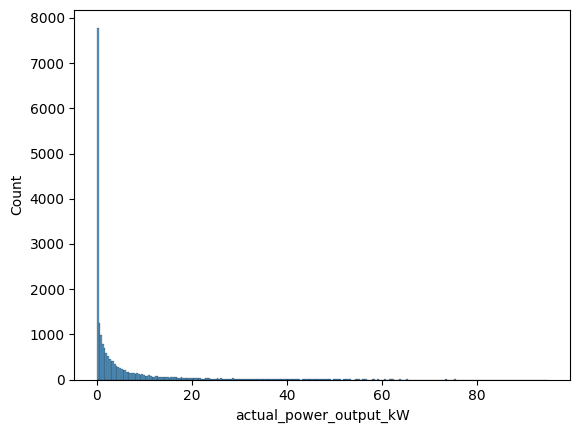

In [7]:
sns.histplot(df["actual_power_output_kW"])
plt.plot()

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['timestamp'] = label_encoder.fit_transform(df['timestamp'])




In [12]:
df.drop(columns=["timestamp"],inplace=True)

In [13]:
df.head()

,location_lat,location_lon,elevation_m,temperature_C,humidity_%,wind_speed_m_s,cloud_cover_%,solar_irradiance_W_m2,panel_capacity_kW,panel_efficiency_%,tilt_angle_deg,azimuth_deg,actual_power_output_kW
0,-22.582779,82.799392,896.736124,-1.629966,84.237036,2.997440,32.912325,0.000000,371.036046,22.272467,34.846743,270,0.000000
1,81.128575,-113.575682,284.453326,0.033410,91.951477,1.921751,14.395022,43.078871,440.669836,12.179046,31.618299,270,2.311094
2,41.758910,-55.209710,379.077675,-2.808337,79.259359,3.298926,40.869295,0.000000,232.126758,24.196957,21.062217,90,0.000000
3,17.758527,58.781029,542.013385,3.345238,87.685304,3.043634,61.477860,138.258448,145.300187,22.648362,29.592759,270,4.549710
4,-61.916645,-6.447836,610.960003,-0.374230,65.194276,4.385814,35.145649,108.339004,160.104441,23.782799,21.905798,270,4.084163


In [37]:
x = df.drop(columns=["actual_power_output_kW"])  # Features
y = df["actual_power_output_kW"]  # Target variable

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [41]:
ypred = model.predict(xtest)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 2.6886016425615877
Mean Squared Error: 20.703219716624044
R-squared Score: 0.722229204751731


In [44]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
model.score(xtest,ytest)

0.9954461120894688